In [ ]:
from google.colab import files


uploaded = files.upload()

Saving sustainable_fashion_trends_2024.csv to sustainable_fashion_trends_2024.csv


**Importing Libraries**

In [ ]:
#Importing useful python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
#Loading dataset
df=pd.read_csv('sustainable_fashion_trends_2024.csv')

**Main structures in pandas are Series and Dataframes, Series  is a 1D indexed array with fixed datatype where dataframe is 2D like a table where each column contains same dtypes**

In [ ]:
df.describe()   #Only numerical values are included

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [ ]:
df.describe(include=['object'])   #Columns other than numerical values  are also inluded

,Brand_ID,Brand_Name,Country,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Recycling_Programs,Market_Trend,Certifications
count,5000,5000,5000,5000,5000,5000,5000,5000,3996
unique,5000,5000,10,4,6,2,2,3,4
top,BRAND-5000,Brand_5000,UK,B,Recycled Polyester,Yes,Yes,Stable,GOTS
freq,1,1,515,1278,867,2520,2528,1709,1050


**Using describe function only numerical values are shown, to get infor about non numerical values you have to explicitly mention those columns.**








In [ ]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [ ]:
print(df.shape)

(5000, 15)


In [ ]:
print(df.columns)

Index(['Brand_ID', 'Brand_Name', 'Country', 'Year', 'Sustainability_Rating',
       'Material_Type', 'Eco_Friendly_Manufacturing', 'Carbon_Footprint_MT',
       'Water_Usage_Liters', 'Waste_Production_KG', 'Recycling_Programs',
       'Product_Lines', 'Average_Price_USD', 'Market_Trend', 'Certifications'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [ ]:
#sorting data based on sustainability_rating
df.sort_values(by='Sustainability_Rating', ascending=False)

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1512,BRAND-1513,Brand_1513,France,2014,D,Hemp,No,416.03,1326655.19,66949.87,No,1,305.91,Declining,OEKO-TEX
4000,BRAND-4001,Brand_4001,Germany,2019,D,Vegan Leather,No,121.44,2100593.06,71893.61,Yes,4,105.28,Stable,GOTS
1539,BRAND-1540,Brand_1540,China,2019,D,Organic Cotton,Yes,399.18,4820558.13,5073.08,Yes,12,481.06,Stable,OEKO-TEX
4005,BRAND-4006,Brand_4006,Japan,2015,D,Tencel,Yes,481.88,3002520.22,91606.69,Yes,2,232.14,Declining,GOTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,BRAND-1806,Brand_1806,India,2011,A,Tencel,No,30.65,1855142.07,75151.24,Yes,4,304.66,Growing,Fair Trade
1809,BRAND-1810,Brand_1810,Italy,2014,A,Tencel,No,105.96,1150899.01,65124.92,Yes,10,398.01,Stable,Fair Trade
1814,BRAND-1815,Brand_1815,France,2021,A,Bamboo Fabric,No,432.68,1857940.75,78061.47,No,2,93.66,Stable,B Corp
1817,BRAND-1818,Brand_1818,India,2011,A,Tencel,No,69.99,4659764.37,34210.65,Yes,20,499.29,Declining,B Corp


In [ ]:
df['Carbon_Footprint_MT'].mean()  #calculating mean of carbon footprint values

np.float64(250.31755)

In [ ]:
df.loc[0:6,'Material_Type':'Carbon_Footprint_MT']  #getting familiar with loc function

,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT
0,Tencel,No,1.75
1,Vegan Leather,Yes,124.39
2,Vegan Leather,No,336.66
3,Bamboo Fabric,No,152.04
4,Bamboo Fabric,Yes,415.63
5,Recycled Polyester,No,447.65
6,Hemp,Yes,345.64


In [ ]:
df.iloc[0:6,5:8]  # getting faimiliar with iloc function

,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT
0,Tencel,No,1.75
1,Vegan Leather,Yes,124.39
2,Vegan Leather,No,336.66
3,Bamboo Fabric,No,152.04
4,Bamboo Fabric,Yes,415.63
5,Recycled Polyester,No,447.65


**loc method is used for indexing by name, while iloc() is used for indexing by number. DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row.**

In [ ]:
df[-1:]

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
4999,BRAND-5000,Brand_5000,Italy,2016,B,Vegan Leather,No,192.11,3402552.7,81958.82,Yes,11,205.62,Growing,NaN


In [ ]:
#applying functions to each column
#checking material type is either leather or bamboo
df['Material_Type'].apply(lambda x:'Vegan' in x or 'Bamboo' in x).head(20)
#similarly we can do replace function and mapping

,Material_Type
0,False
1,True
2,True
3,True
4,True
5,False
6,False
7,False
8,False
9,True


format of applying a function to a dataframe : df.groupby(by=grouping_columns)[columns_to_show].function()

In [ ]:
grp_by_clm = df.groupby('Sustainability_Rating')[['Country', 'Year','Brand_Name']].apply(lambda x: x.head())
print(grp_by_clm)


                            Country  Year Brand_Name
Sustainability_Rating                               
A                     2         USA  2024    Brand_3
                      6   Australia  2015    Brand_7
                      9       India  2011   Brand_10
                      12      Japan  2024   Brand_13
                      16    Germany  2011   Brand_17
B                     5       Italy  2017    Brand_6
                      10      Italy  2012   Brand_11
                      13        USA  2022   Brand_14
                      18      China  2012   Brand_19
                      20  Australia  2012   Brand_21
C                     7      Brazil  2022    Brand_8
                      11         UK  2015   Brand_12
                      15      China  2013   Brand_16
                      19  Australia  2018   Brand_20
                      25      China  2018   Brand_26
D                     0   Australia  2018    Brand_1
                      1       Japan  2015    B

In [ ]:
#creating diff types of tables


#crosstables
pd.crosstab(df['Brand_ID'],df['Eco_Friendly_Manufacturing'])    #in the context of two variables

Eco_Friendly_Manufacturing,No,Yes
Brand_ID,,
BRAND-0001,1,0
BRAND-0002,0,1
BRAND-0003,1,0
BRAND-0004,1,0
BRAND-0005,0,1
...,...,...
BRAND-4996,0,1
BRAND-4997,0,1
BRAND-4998,0,1


In [ ]:
#pivot_table
pt=df.pivot_table(['Average_Price_USD','Product_Lines','Carbon_Footprint_MT','Water_Usage_Liters','Waste_Production_KG'],['Brand_ID'])
pt.dropna(inplace=True)
pt

,Average_Price_USD,Carbon_Footprint_MT,Product_Lines,Waste_Production_KG,Water_Usage_Liters
Brand_ID,,,,,
BRAND-0001,38.33,1.75,2.0,97844.11,4511152.79
BRAND-0002,250.07,124.39,15.0,37267.75,1951566.31
BRAND-0003,146.16,336.66,2.0,38385.92,467454.52
BRAND-0004,165.52,152.04,13.0,32665.45,899576.90
BRAND-0005,211.63,415.63,19.0,37295.47,1809219.90
...,...,...,...,...,...
BRAND-4996,490.95,423.73,1.0,50532.28,251736.61
BRAND-4997,53.92,68.24,13.0,64214.57,2342347.78
BRAND-4998,431.32,321.12,12.0,81467.21,317800.67


pivot_table method takes the following parameters:

values – a list of variables to calculate statistics for,
index – a list of variables to group data by,
aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something els

In [ ]:
df.isnull().sum()  #handling missing values

,0
Brand_ID,0
Brand_Name,0
Country,0
Year,0
Sustainability_Rating,0
Material_Type,0
Eco_Friendly_Manufacturing,0
Carbon_Footprint_MT,0
Water_Usage_Liters,0
Waste_Production_KG,0


In [ ]:
df=df.dropna()   #dropping null value columns

In [ ]:
df.shape

(3996, 15)

In [ ]:
df.duplicated()  #finding duplicated columns

,0
0,False
1,False
2,False
3,False
4,False
...,...
4992,False
4993,False
4994,False
4996,False


In [ ]:
df.drop_duplicates()   #dropping duplicates

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,BRAND-4993,Brand_4993,UK,2019,B,Recycled Polyester,No,370.50,3456523.67,69110.26,Yes,7,149.51,Declining,OEKO-TEX
4993,BRAND-4994,Brand_4994,Italy,2019,B,Hemp,No,389.81,287417.81,57014.58,Yes,10,40.28,Stable,Fair Trade
4994,BRAND-4995,Brand_4995,India,2021,B,Recycled Polyester,Yes,77.50,295297.69,55482.00,Yes,5,46.91,Declining,GOTS
4996,BRAND-4997,Brand_4997,Germany,2012,C,Bamboo Fabric,Yes,68.24,2342347.78,64214.57,Yes,13,53.92,Stable,Fair Trade


In [ ]:
#feature engineering


#creating new column called carbon_foorprint_category
sections=[0,150,300,450]
labels=['Low Emission','Medium Emission','High Emission']
df['Carbon_Footprint_Category']=pd.cut(df['Carbon_Footprint_MT'], bins=sections, labels=labels, include_lowest=True)
df['Carbon_Footprint_Category'].head(20)

,Carbon_Footprint_Category
0,Low Emission
1,Low Emission
2,High Emission
3,Medium Emission
4,High Emission
5,High Emission
6,High Emission
7,High Emission
8,High Emission
10,High Emission


In [ ]:
df['Carbon_Footprint_Category'].dropna()  #removing null values from newly created columns

,Carbon_Footprint_Category
0,Low Emission
1,Low Emission
2,High Emission
3,Medium Emission
4,High Emission
...,...
4992,High Emission
4993,High Emission
4994,Low Emission
4996,Low Emission


#Visualizations

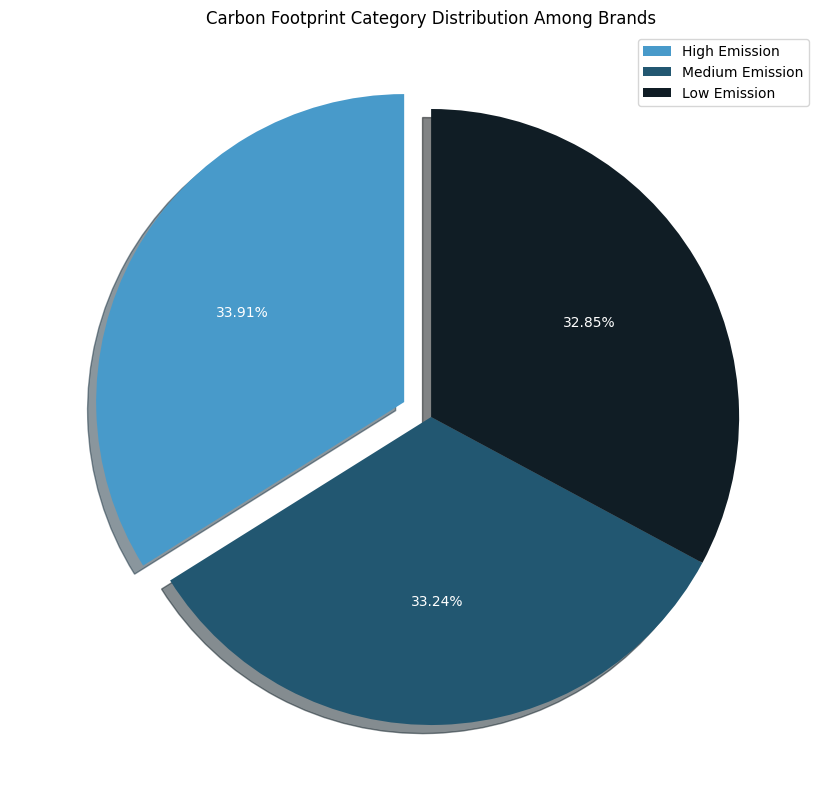

In [ ]:
#pie chart showing percentages of levels of emmissions
plt.figure(figsize=(10,10))
explode = [0.1, 0, 0]
df['Carbon_Footprint_Category'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90,explode=explode, shadow=True, colors=sns.color_palette("berlin"), textprops={'color': 'white'})
plt.title('Carbon Footprint Category Distribution Among Brands')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()


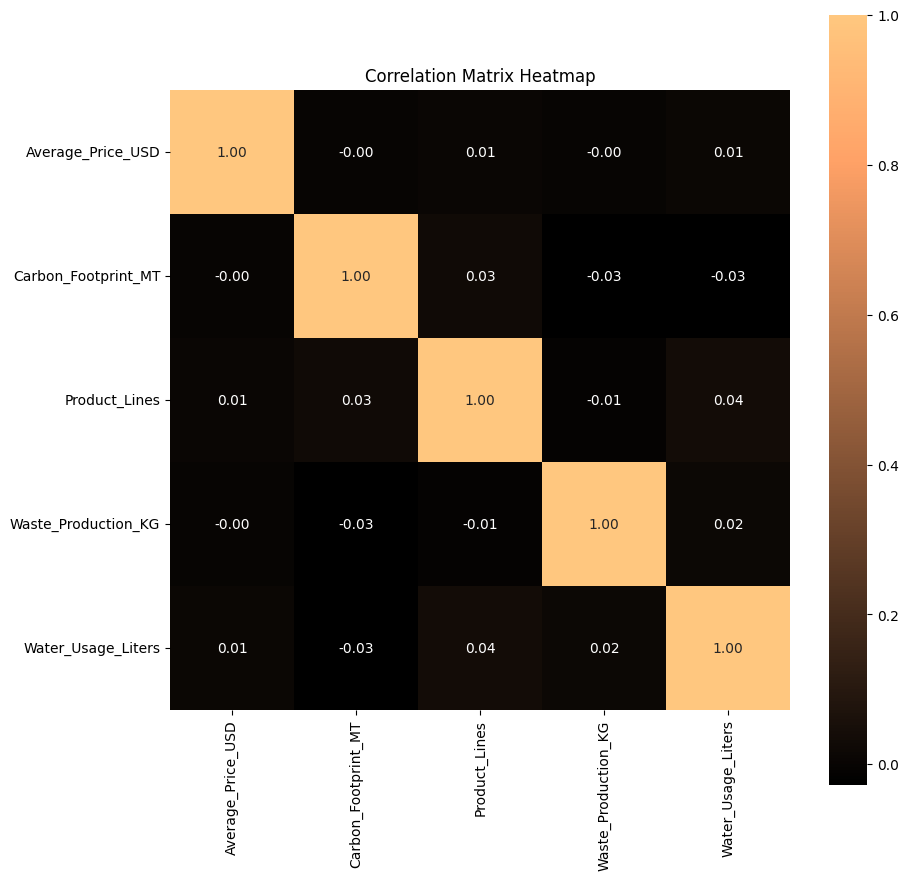

In [ ]:
#heatmap showing correlation between numerical values
corr = pt.corr()  # Compute correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='copper', square=True, linewidths=0.0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
from wordcloud import WordCloud

# Remove any leading or trailing spaces
df['Material_Type'] = df['Material_Type'].str.strip()
# convert to lowercase for uniformity
df['Material_Type'] = df['Material_Type'].str.lower()

In [ ]:
# Count the occurrences of each material type
material_counts = df['Material_Type'].value_counts()
# Convert to a dictionary format suitable for the WordCloud
material_freq = material_counts.to_dict()

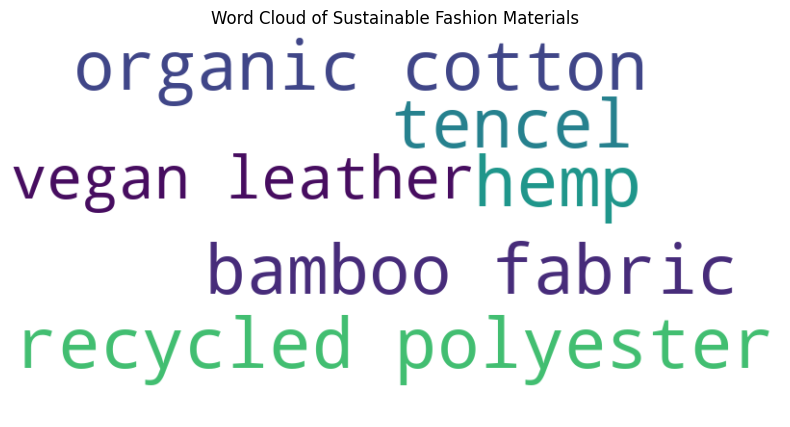

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(material_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sustainable Fashion Materials')
plt.show()


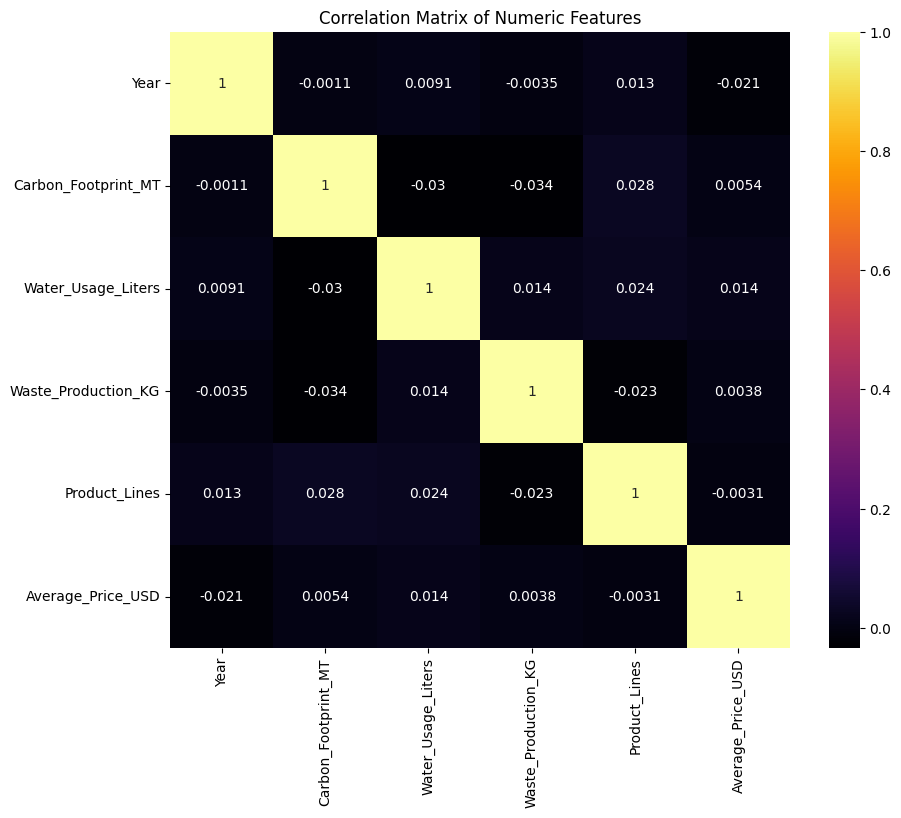

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
# Compute correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno', linewidths=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

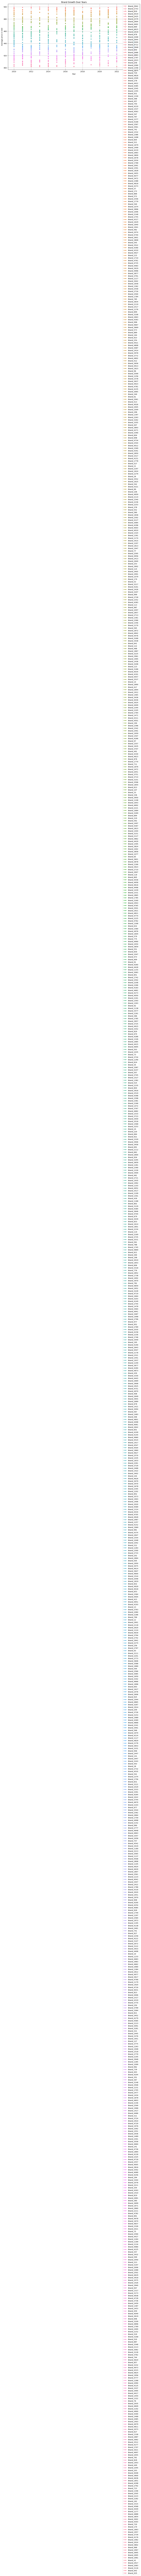

In [139]:
#Plotting brands with their year and average price
brand_year = df.groupby(['Brand_Name', 'Year'])['Average_Price_USD'].sum().nlargest(1000).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=brand_year, x='Year', y='Average_Price_USD',hue='Brand_Name', marker='o')
plt.title('Brand Growth Over Years')
plt.ylabel('Average price in USD')
plt.xlabel('Year')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
#scatterplot showing each country and price
avg_price_country = df.groupby('Country')['Average_Price_USD'].mean().reset_index()

fig = px.scatter_geo(
    avg_price_country,
    locations="Country",
    locationmode='country names',
    color="Average_Price_USD",
    size="Average_Price_USD",
    projection="natural earth",
    title='Average Price in USD by Country',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.show()
